In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.shape

(19820, 18)

In [4]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [7]:
X = df.iloc[:, 1:].values
Y = df['selling_price'].values

In [10]:
ones = np.ones((len(X), 1))
ones.shape

(19820, 1)

In [11]:
X = np.hstack((ones, X))
X.shape

(19820, 18)

In [12]:
X[:3]

array([[ 1.        , -0.80131654,  1.19582817,  0.04574517, -1.31075443,
        -1.15777962,  0.80131654, -0.43385435, -1.12568266,  1.24889206,
        -0.09838223, -0.9852749 , -0.02009467, -0.0569168 ,  1.0246219 ,
         0.4958182 ,  0.44450319, -0.42472845],
       [ 1.        ,  0.45003028, -0.73787208, -0.14040198, -0.53745638,
        -0.36020313, -0.45003028, -0.32750073, -0.3332271 ,  1.24889206,
        -0.09838223, -0.9852749 , -0.02009467, -0.0569168 ,  1.0246219 ,
         0.4958182 ,  0.44450319, -0.42472845],
       [ 1.        , -1.42698996,  0.03560802, -0.58250146, -0.53745638,
        -0.40488529,  1.42698996, -0.32750073, -0.78980745,  1.24889206,
        -0.09838223, -0.9852749 , -0.02009467, -0.0569168 ,  1.0246219 ,
         0.4958182 ,  0.44450319, -0.42472845]])

In [13]:
def hypothesis(X, W):
    return np.dot(X, W)

In [15]:
def error(X, Y, W):
    Y_hat = hypothesis(X, W)

    err = np.mean((Y - Y_hat)**2)
    return err

In [16]:
def gradient(X, Y, W):
    Y_hat = hypothesis(X, W)
    grad = np.dot(X.T, (Y_hat - Y))
    
    return 2*grad/len(X)

In [19]:
def gradient_descent(X, Y, max_itr = 100, learning_rate = 0.1):
    # step 1 : init() randomly
    
    W = np.random.rand(X.shape[1])
    error_list = []
    
    # step 2: repeate 100 times
    for i in range(max_itr):
        e = error(X, Y, W)
        error_list.append(e)
        
        grad = gradient(X, Y, W)
        W = W - learning_rate*grad
        
    
    return W.round(3), error_list

In [21]:
W, error_list = gradient_descent(X, Y)

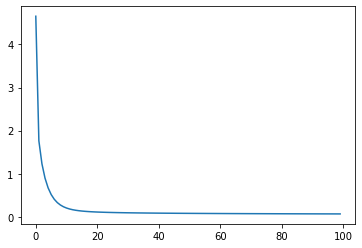

In [22]:
plt.plot(error_list)

In [23]:
W

array([ 0.   ,  0.821, -0.022, -0.001,  0.033,  0.058,  0.703,  0.085,
        0.767, -0.018, -0.001,  0.161,  0.01 ,  0.023,  0.151, -0.02 ,
        0.272,  0.289])

In [30]:
X[188].shape

(18,)

In [26]:
xq = X[188]

In [32]:
hypothesis(xq.reshape((-1, 18)), W)

array([-0.43450933])

In [33]:
def r2_score(Y, y_pred):
    num = np.sum((Y-y_pred)**2)
    denom = np.sum((Y-Y.mean())**2)
    r2 = (1- num/denom)
    
    return r2.round(2)

In [35]:
Y_hat = hypothesis(X, W)

In [36]:
r2_score(Y, Y_hat)

0.93

## Sklearn Code

In [37]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.shape

(19820, 18)

In [38]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [39]:
X = df.iloc[:, 1:].values
Y = df['selling_price'].values

In [47]:
X.shape

(19820, 17)

In [48]:
Y.shape

(19820,)

In [49]:
# pip install scikit-learn

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [52]:
# W, error_list = gradient_descent(X, Y)
model.fit(X, Y)

LinearRegression()

In [54]:
X[180]

array([ 0.13719357, -0.06107699,  1.38135096, -1.04077506, -0.93436884,
       -0.13719357, -0.93556599, -0.98083648, -0.80070971, -0.09838223,
        1.01494517, -0.02009467, -0.0569168 , -0.97596977,  0.4958182 ,
        0.44450319, -0.42472845])

In [67]:
xq = X[95].reshape(1, -1)
xq.shape

(1, 17)

In [68]:
Y[95]

-0.5849735612632836

In [69]:
model.predictxq()

array([-0.58438929])

In [64]:
Y_hat = model.predict(X)

In [65]:
r2_score(Y, Y_hat)

0.94

In [70]:
model.coef_

array([ 0.06495341, -0.0182326 , -0.0486858 ,  0.03138293,  0.0273649 ,
       -0.06495341,  0.06078463,  0.79415416, -0.01695224, -0.00347518,
        0.01408238,  0.01275246,  0.00283068, -0.02258059, -0.01293416,
       -0.02464122, -0.03265486])

In [72]:
model.intercept_.round(3)

-0.0

In [73]:
model.score(X, Y)

0.9421889572026914

## Adj Rsquared

In [74]:
r2 = model.score(X, Y)

In [78]:
n,d = X.shape
1- (1 - r2)*(n-1)/ (n-d+200+-1)

0.9421393264720807

In [82]:
1- (1 - r2)*(n-1)/ (n-d-5000+-1)

0.9225944428320592

## Sklearn Linear regression on univariate data